In [ ]:
# Name: Lilli Nappi
# CWID: 20006502
# HW08_ANN

implementation of ANN for IRIS dataset

#### Importing essential libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

#### Loading data from CSV

In [16]:
df = pd.read_csv('breast-cancer-wisconsin.csv')

df = df.replace(['?'], None)
missing_values = df.isnull().any()
print(missing_values)


Sample    False
F1        False
F2        False
F3        False
F4        False
F5        False
F6         True
F7        False
F8        False
F9        False
Class     False
dtype: bool


In [21]:
df['F6'] = pd.to_numeric(df['F6'], errors='coerce')
df['F6'].fillna(df['F6'].mean(),inplace=True)
missing_values = df.isnull().any()
df['F6'] = df['F6'].astype(int)
print(missing_values)

Sample    False
F1        False
F2        False
F3        False
F4        False
F5        False
F6        False
F7        False
F8        False
F9        False
Class     False
dtype: bool


<ipython-input-21-7e3f1138916f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].fillna(df['F6'].mean(),inplace=True)


In [22]:
df.head(10)

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


#### Splitting data into attributes & target

In [23]:
attr = df.drop(columns=[ 'Class'])
target = df['Class']

In [24]:
attr.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1000025,5,1,1,1,2,1,3,1,1
1,1002945,5,4,4,5,7,10,3,2,1
2,1015425,3,1,1,1,2,2,3,1,1
3,1016277,6,8,8,1,3,4,3,7,1
4,1017023,4,1,1,3,2,1,3,1,1


In [25]:
target=pd.get_dummies(target,prefix='ouput')
target.head()

,ouput_2,ouput_4
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


#### Normalizing data

In [26]:
scaler = StandardScaler()
attr = pd.DataFrame(scaler.fit_transform(attr), columns=attr.columns)
attr.head()

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.703348,-0.179662,-0.611825,-0.343912
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.796516,-0.179662,-0.284112,-0.343912
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.425585,-0.179662,-0.611825,-0.343912
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.129940,-0.179662,1.354454,-0.343912
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.703348,-0.179662,-0.611825,-0.343912


#### Splitting data into training and testing

In [27]:
X_train, X_test, y_train, y_test = train_test_split(attr, target,random_state=82, test_size=0.3)

### Artificial Neural Network

In [31]:
model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Loss Curve

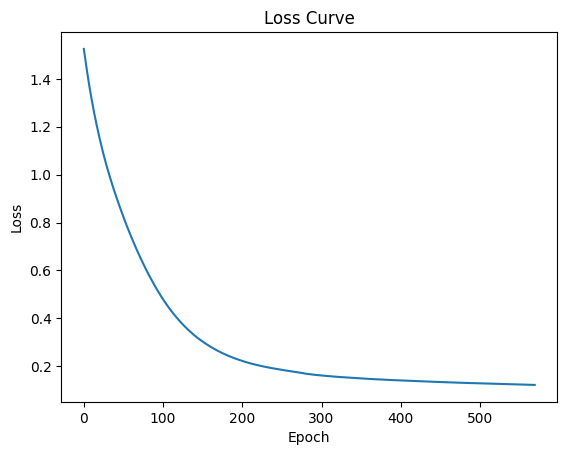

In [32]:
sns.lineplot(x=range(len(model.loss_curve_)), y=model.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#### Evaluation

In [33]:
# Accuracy Score

accuracy = metrics.accuracy_score(y_pred, y_test)
print("Accuracy: {} ({:.2%})".format(accuracy, accuracy))

Accuracy: 0.9666666666666667 (96.67%)
